In [1]:
# 구글 코랩에서 데이터셋 다운로드 및 준비
from google.colab import files
files.upload()  # 'kaggle.json' 파일 업로드

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Rice Image 데이터셋 다운로드
!kaggle datasets download -d muratkokludataset/rice-image-dataset

# 압축 해제
!unzip rice-image-dataset.zip -d rice-image

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: rice-image/Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: rice-image/Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: rice-image/Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: rice-image/Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: rice-image/Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: rice-image/Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: rice-image/Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: rice-image/Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: rice-image/Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: rice-image/Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: rice-image/Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: rice-image/Rice_Image_Dataset/Karacadag/Karacadag (5509).jpg  
  inflating: rice-image/Rice_Image_Dataset/Karacadag/Ka

# DB 연결

In [2]:
import sqlite3

In [3]:
def save_experiment(model_name, data_size, accuracy, total_epochs):
    conn = sqlite3.connect("experiments.db")
    cursor = conn.cursor()

    # 테이블이 없는 경우 생성 (처음 실행 시 필요)
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS experiments (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        model_name TEXT,
        data_size INTEGER,
        accuracy REAL,
        total_epochs INTEGER,
        date TEXT
    )
    ''')

    query = '''
    INSERT INTO experiments (model_name, data_size, accuracy, total_epochs, date)
    VALUES (?, ?, ?, ?, DATE('now'))
    '''
    cursor.execute(query, (model_name, data_size, accuracy, total_epochs))

    conn.commit()
    conn.close()

# vgg16

사용 중인 디바이스: cuda:0
클래스 수: 5
클래스 목록: ['Karacadag', 'Basmati', 'Jasmine', 'Ipsala', 'Arborio']
총 이미지 수: 75000
클래스 Karacadag: 15000개 이미지
클래스 Basmati: 15000개 이미지
클래스 Jasmine: 15000개 이미지
클래스 Ipsala: 15000개 이미지
클래스 Arborio: 15000개 이미지

선택한 데이터셋 크기: 0.5%
훈련 데이터셋 크기: 240개
검증 데이터셋 크기: 60개
테스트 데이터셋 크기: 15000개

클래스별 분포:
클래스 Karacadag: 훈련 46개, 검증 14개, 테스트 3000개
클래스 Basmati: 훈련 43개, 검증 17개, 테스트 3000개
클래스 Jasmine: 훈련 53개, 검증 7개, 테스트 3000개
클래스 Ipsala: 훈련 49개, 검증 11개, 테스트 3000개
클래스 Arborio: 훈련 49개, 검증 11개, 테스트 3000개


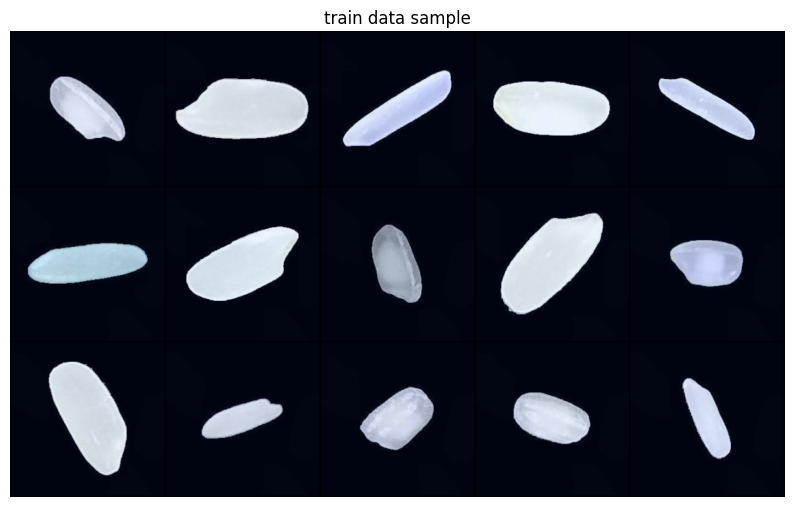

표시된 이미지의 클래스:
1: Arborio
2: Ipsala
3: Basmati
4: Ipsala
5: Basmati
6: Jasmine
7: Ipsala
8: Arborio
9: Ipsala
10: Karacadag
11: Ipsala
12: Jasmine
13: Arborio
14: Arborio
15: Jasmine


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 128MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


모델 학습 시작...
Epoch 1/50
----------
Train Loss: 1.6239 Acc: 0.2042
Val Loss: 1.3664 Acc: 0.8333
최고 정확도 모델 저장: Acc=0.8333, Loss=1.3664

Epoch 2/50
----------
Train Loss: 1.3110 Acc: 0.8667
Val Loss: 1.0661 Acc: 0.8833
최고 정확도 모델 저장: Acc=0.8833, Loss=1.0661

Epoch 3/50
----------
Train Loss: 0.9827 Acc: 0.9375
Val Loss: 0.7484 Acc: 0.9167
최고 정확도 모델 저장: Acc=0.9167, Loss=0.7484

Epoch 4/50
----------
Train Loss: 0.6622 Acc: 0.9667
Val Loss: 0.4997 Acc: 0.9167
개선 없음: 1/5

Epoch 5/50
----------
Train Loss: 0.4064 Acc: 0.9625
Val Loss: 0.3452 Acc: 0.9167
개선 없음: 2/5

Epoch 6/50
----------
Train Loss: 0.2659 Acc: 0.9583
Val Loss: 0.2559 Acc: 0.9167
개선 없음: 3/5

Epoch 7/50
----------
Train Loss: 0.1664 Acc: 0.9542
Val Loss: 0.2091 Acc: 0.9167
개선 없음: 4/5

Epoch 8/50
----------
Train Loss: 0.1113 Acc: 0.9792
Val Loss: 0.1796 Acc: 0.9167
개선 없음: 5/5
Early stopping 실행! 5번의 에폭 동안 검증 정확도가 개선되지 않았습니다.

학습 완료. 최고 검증 정확도: 0.9167
학습 완료!


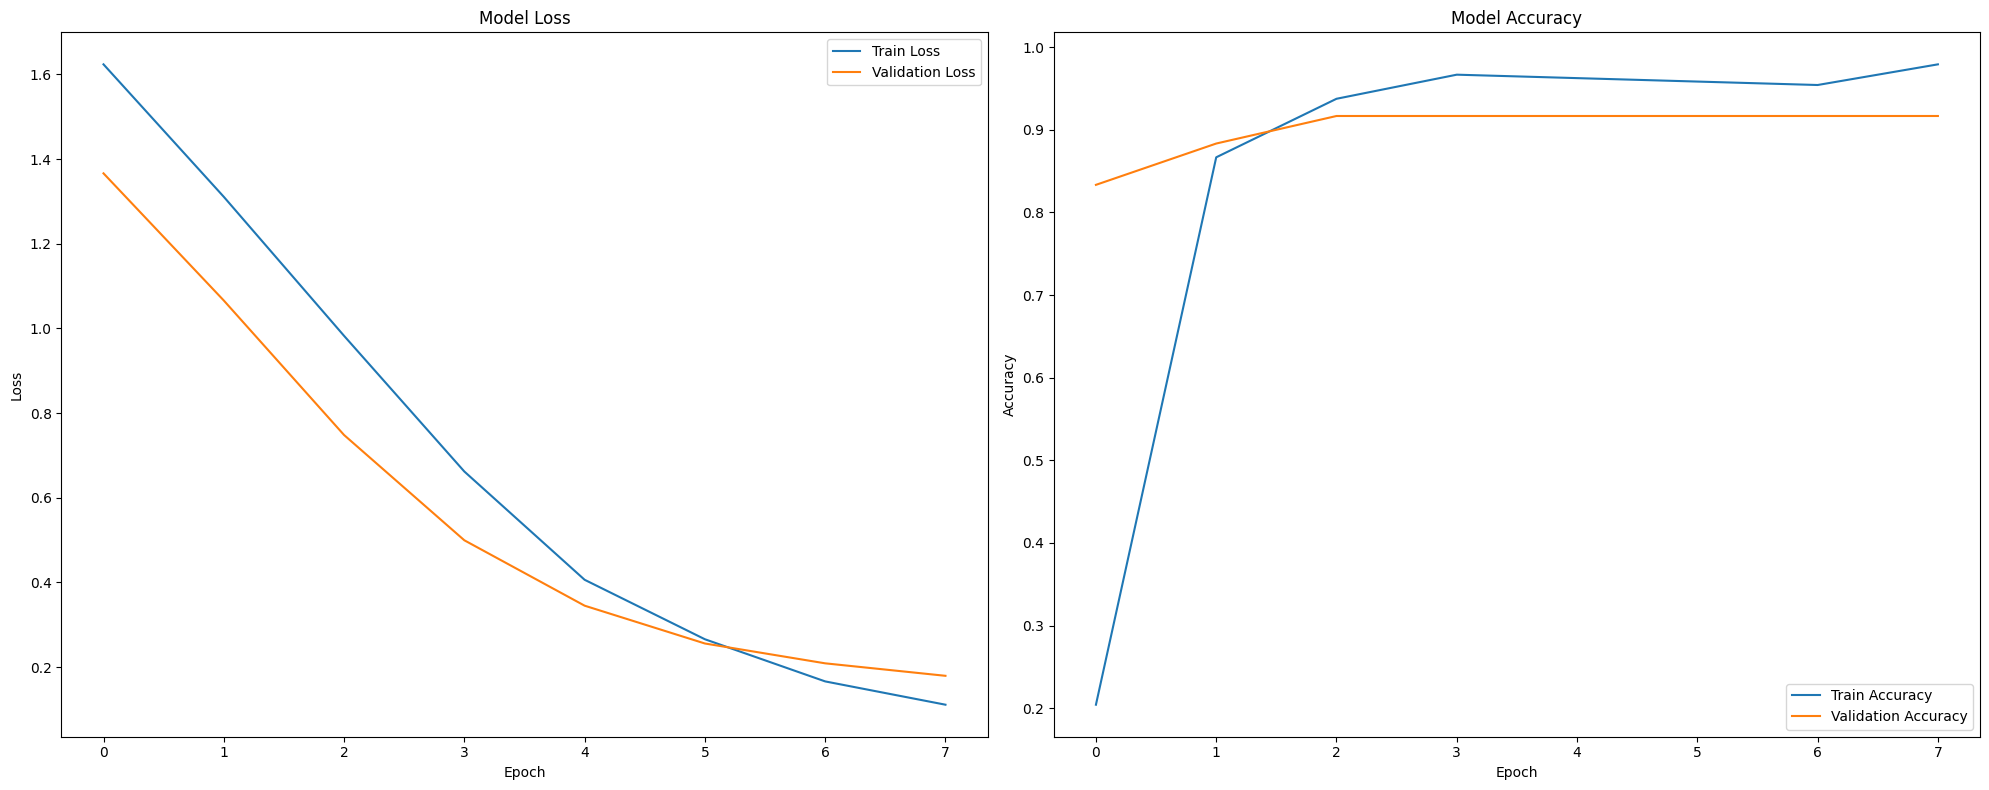

최적 모델 로드 (에폭: 3, 검증 손실: 0.7484)
최종 테스트 손실: 0.7288, 최종 테스트 정확도: 0.9198
실험 결과가 데이터베이스에 저장되었습니다. (ID: 1)

===== 테스트 결과 =====
테스트 손실: 0.7288
테스트 정확도: 0.9198

클래스별 정확도:
  Karacadag: 0.9837
  Basmati: 0.9140
  Jasmine: 0.8090
  Ipsala: 0.9957
  Arborio: 0.8967


In [4]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.models import vgg16, VGG16_Weights
import torchvision.utils as vutils

# GPU 사용 가능 여부 확인
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"사용 중인 디바이스: {device}")

# 랜덤 시드 설정
random_seed = 69
random.seed(random_seed)
torch.manual_seed(random_seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(random_seed)
    torch.cuda.manual_seed_all(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

# **2. 데이터셋 탐색**
# 데이터셋 경로 지정
dataset_path = "/content/rice-image/Rice_Image_Dataset"

# 클래스 폴더 목록 가져오기
class_folders = [f.name for f in os.scandir(dataset_path) if f.is_dir()]

# 클래스 수 출력
num_classes = len(class_folders)
print("클래스 수:", num_classes)
print("클래스 목록:", class_folders)

# **3. 커스텀 데이터셋 클래스 생성**
class RiceDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = [d.name for d in os.scandir(root_dir) if d.is_dir()]
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(self.classes)}

        self.image_paths = []
        self.labels = []

        # 이미지 파일과 레이블 수집
        for class_name in self.classes:
            class_dir = os.path.join(self.root_dir, class_name)
            for img_name in os.listdir(class_dir):
                if img_name.endswith('.jpg') or img_name.endswith('.png'):
                    self.image_paths.append(os.path.join(class_dir, img_name))
                    self.labels.append(self.class_to_idx[class_name])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# **4. 데이터 변환**
# 학습 데이터 변환
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 검증 데이터 변환
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# **5. 데이터 분할 및 로드**
# 전체 데이터셋 생성
full_dataset = RiceDataset(root_dir=dataset_path, transform=None)
print(f"총 이미지 수: {len(full_dataset)}")

# 클래스별 인덱스 수집
class_indices = [[] for _ in range(num_classes)]
for idx in range(len(full_dataset)):
    _, class_idx = full_dataset[idx]
    class_indices[class_idx].append(idx)

# 클래스별 이미지 수 확인
for i, indices in enumerate(class_indices):
    print(f"클래스 {full_dataset.classes[i]}: {len(indices)}개 이미지")

# 테스트 세트 분리 (20% - 각 클래스당 3,000장)
test_indices = []
remaining_indices = []

for i, indices in enumerate(class_indices):
    # 각 클래스에서 테스트용 20% 추출
    np.random.shuffle(indices)
    test_size = int(len(indices) * 0.2)

    test_indices.extend(indices[:test_size])
    remaining_indices.extend(indices[test_size:])

# 데이터셋 크기 설정 (1.0, 0.5, 0.1, 0.01 중 선택)
size_percentage = 0.005  # 여기를 변경하여 데이터셋 크기 조절

# 선택한 비율의 데이터만 사용
available_indices = []
if size_percentage < 1.0:
    # 클래스별로 선택
    class_remaining = [[] for _ in range(num_classes)]
    for idx in remaining_indices:
        _, class_idx = full_dataset[idx]
        class_remaining[class_idx].append(idx)

    for class_idx, indices in enumerate(class_remaining):
        # 클래스별로 지정된 비율만큼 선택
        selected_size = int(len(indices) * size_percentage)
        available_indices.extend(indices[:selected_size])
else:
    # 100%인 경우 모든 남은 인덱스 사용
    available_indices = remaining_indices

# 훈련/검증 데이터 분할 (80:20)
np.random.shuffle(available_indices)
train_size = int(0.8 * len(available_indices))
train_indices = available_indices[:train_size]
val_indices = available_indices[train_size:]

# Subset으로 데이터셋 생성
train_dataset = torch.utils.data.Subset(full_dataset, train_indices)
val_dataset = torch.utils.data.Subset(full_dataset, val_indices)
test_dataset = torch.utils.data.Subset(full_dataset, test_indices)

# 데이터셋에 transform 적용
# 참고: Subset에는 transform을 직접 설정할 수 없으므로 wrapper 클래스 사용
class TransformSubset(Dataset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform

    def __len__(self):
        return len(self.subset)

    def __getitem__(self, idx):
        image, label = self.subset[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# 변환이 적용된 데이터셋 생성
train_dataset_transformed = TransformSubset(train_dataset, train_transform)
val_dataset_transformed = TransformSubset(val_dataset, val_transform)
test_dataset_transformed = TransformSubset(test_dataset, val_transform)

# 데이터 로더 생성
batch_size = 256
train_loader = DataLoader(train_dataset_transformed, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset_transformed, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset_transformed, batch_size=batch_size, shuffle=False, num_workers=4)

# 데이터셋 크기 출력
print(f"\n선택한 데이터셋 크기: {size_percentage * 100}%")
print(f"훈련 데이터셋 크기: {len(train_dataset)}개")
print(f"검증 데이터셋 크기: {len(val_dataset)}개")
print(f"테스트 데이터셋 크기: {len(test_dataset)}개")

# 각 데이터셋의 클래스 분포 확인
def check_class_distribution(subset):
    class_count = [0] * num_classes
    for idx in range(len(subset)):
        _, label = subset[idx]
        class_count[label] += 1
    return class_count

train_dist = check_class_distribution(train_dataset)
val_dist = check_class_distribution(val_dataset)
test_dist = check_class_distribution(test_dataset)

print("\n클래스별 분포:")
for i in range(num_classes):
    print(f"클래스 {full_dataset.classes[i]}: 훈련 {train_dist[i]}개, 검증 {val_dist[i]}개, 테스트 {test_dist[i]}개")


# **6. 이미지 샘플 시각화**
def show_batch(dataloader):
    # 배치 하나 가져오기
    images, labels = next(iter(dataloader))
    images = images.cpu()  # GPU를 사용하는 경우 CPU로 이동

    # 정규화된 이미지를 시각화를 위해 조정
    grid = vutils.make_grid(images[:15], nrow=5, normalize=True)
    grid = grid.permute(1, 2, 0).numpy()

    plt.figure(figsize=(10, 10))
    plt.imshow(grid)

    # 레이블 가져오기
    class_names = list(full_dataset.class_to_idx.keys())
    label_names = [class_names[labels[i].item()] for i in range(15)]

    plt.title('train data sample')
    plt.axis('off')
    plt.show()

    print("표시된 이미지의 클래스:")
    for i, label in enumerate(label_names):
        print(f"{i+1}: {label}")

# 학습 데이터 샘플 시각화
show_batch(train_loader)

# **7. VGG16 모델 로드 및 수정**
# 사전 훈련된 VGG16 모델 로드
model = vgg16(weights=VGG16_Weights.IMAGENET1K_V1)

# VGG16의 마지막 4개 레이어만 훈련 가능하게 설정
for param in model.parameters():
    param.requires_grad = False

# 마지막 4개 레이어 훈련 가능하게 설정
trainable_layers = list(model.features.children())[-4:]
for layer in trainable_layers:
    for param in layer.parameters():
        param.requires_grad = True

# 분류기(classifier) 부분 수정
model.classifier = nn.Sequential(
    nn.Linear(512 * 7 * 7, 4096),
    nn.ReLU(True),
    nn.Dropout(0.5),
    nn.Linear(4096, 512),
    nn.ReLU(True),
    nn.Dropout(0.3),
    nn.Linear(512, num_classes)
)

# 모델을 GPU로 이동
model = model.to(device)

# 모델 구조 출력
print(model)

# **8. 손실 함수 및 옵티마이저 설정**
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.2, patience=3, min_lr=1e-8, verbose=True)

# **9. 모델 체크포인트 함수**
def save_checkpoint(model, epoch, optimizer, val_loss, val_acc, filename):
    """
    모델 체크포인트를 저장하는 함수
    """
    state = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'val_loss': val_loss,
        'val_acc': val_acc
    }
    torch.save(state, filename)

# **10. 학습 및 검증 함수**
def train_one_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    running_corrects = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # 그라디언트 초기화
        optimizer.zero_grad()

        # 순전파
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # 역전파 및 최적화
        loss.backward()
        optimizer.step()

        # 통계
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc = running_corrects.double() / total

    return epoch_loss, epoch_acc.item()

def validate(model, val_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # 순전파
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            # 통계
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
            total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc = running_corrects.double() / total

    return epoch_loss, epoch_acc.item()

import sqlite3
import time
import json
import torch
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# 테스트 함수 정의
def test_model(model, test_loader, criterion, device):
    model.eval()  # 평가 모드로 설정
    test_loss = 0.0
    correct = 0
    total = 0

    # 예측값과 실제값 저장용
    all_preds = []
    all_labels = []

    with torch.no_grad():  # 그래디언트 계산 비활성화
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # 순전파
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # 통계 업데이트
            test_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (preds == labels).sum().item()

            # 나중에 분석을 위해 예측값과 실제값 저장
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # 결과 계산
    test_loss = test_loss / total
    test_acc = correct / total

    # 분류 보고서 생성
    class_names = test_loader.dataset.subset.dataset.classes
    report = classification_report(all_labels, all_preds,
                                 target_names=class_names,
                                 output_dict=True)

    # 혼동 행렬 계산
    conf_matrix = confusion_matrix(all_labels, all_preds)

    # 클래스별 정확도 계산
    class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

    return {
        'test_loss': test_loss,
        'test_acc': test_acc,
        'classification_report': report,
        'confusion_matrix': conf_matrix.tolist(),
        'class_accuracy': class_accuracy.tolist()
    }

# 데이터베이스 초기화 함수
def init_database():
    conn = sqlite3.connect('model_performance.db')
    c = conn.cursor()

    # 실험 결과 테이블 생성
    c.execute('''
    CREATE TABLE IF NOT EXISTS experiments (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        timestamp TEXT,
        model_name TEXT,
        dataset_size_percentage REAL,
        train_size INTEGER,
        val_size INTEGER,
        test_size INTEGER,
        num_classes INTEGER,
        batch_size INTEGER,
        learning_rate REAL,
        epochs INTEGER,
        best_epoch INTEGER,
        train_loss REAL,
        train_acc REAL,
        val_loss REAL,
        val_acc REAL,
        test_loss REAL,
        test_acc REAL,
        class_metrics TEXT,  -- JSON 형식으로 저장
        notes TEXT
    )
    ''')

    conn.commit()
    return conn

# 결과 저장 함수
def save_results_to_db(conn, model_name, size_percentage, train_size, val_size, test_size,
                      num_classes, batch_size, learning_rate, epochs, best_epoch,
                      train_loss, train_acc, val_loss, val_acc, test_results, notes=""):

    # 클래스별 지표를 JSON으로 변환
    class_metrics = {
        'classification_report': test_results['classification_report'],
        'confusion_matrix': test_results['confusion_matrix'],
        'class_accuracy': test_results['class_accuracy']
    }
    class_metrics_json = json.dumps(class_metrics)

    # 현재 시간 기록
    timestamp = time.strftime('%Y-%m-%d %H:%M:%S')

    # DB에 삽입
    c = conn.cursor()
    c.execute('''
    INSERT INTO experiments (
        timestamp, model_name, dataset_size_percentage, train_size, val_size, test_size,
        num_classes, batch_size, learning_rate, epochs, best_epoch,
        train_loss, train_acc, val_loss, val_acc, test_loss, test_acc,
        class_metrics, notes
    ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', (
        timestamp, model_name, size_percentage, train_size, val_size, test_size,
        num_classes, batch_size, learning_rate, epochs, best_epoch,
        train_loss, train_acc, val_loss, val_acc,
        test_results['test_loss'], test_results['test_acc'],
        class_metrics_json, notes
    ))

    conn.commit()
    print(f"실험 결과가 데이터베이스에 저장되었습니다. (ID: {c.lastrowid})")
    return c.lastrowid

# 메인 코드에서 필요한 곳에 추가
def evaluate_and_save_results(model, train_loader, val_loader, test_loader, train_dataset,
                             val_dataset, test_dataset, criterion, optimizer, device,
                             history, best_epoch, model_name="VGG16", size_percentage=1.0,
                             learning_rate=0.001, notes=""):

    # 모델을 테스트셋으로 평가
    test_results = test_model(model, test_loader, criterion, device)

    # 데이터베이스 연결
    conn = init_database()

    # 결과 저장
    save_results_to_db(
        conn=conn,
        model_name=model_name,
        size_percentage=size_percentage,
        train_size=len(train_dataset),
        val_size=len(val_dataset),
        test_size=len(test_dataset),
        num_classes=len(test_loader.dataset.subset.dataset.classes),
        batch_size=train_loader.batch_size,
        learning_rate=optimizer.param_groups[0]['lr'],
        epochs=len(history['train_loss']) if history else 0,
        best_epoch=best_epoch,
        train_loss=history['train_loss'][-1] if history and history['train_loss'] else None,
        train_acc=history['train_acc'][-1] if history and history['train_acc'] else None,
        val_loss=history['val_loss'][-1] if history and history['val_loss'] else None,
        val_acc=history['val_acc'][-1] if history and history['val_acc'] else None,
        test_results=test_results,
        notes=notes
    )

    # DB 연결 종료
    conn.close()

    # 결과 출력
    print("\n===== 테스트 결과 =====")
    print(f"테스트 손실: {test_results['test_loss']:.4f}")
    print(f"테스트 정확도: {test_results['test_acc']:.4f}")
    print("\n클래스별 정확도:")
    for i, acc in enumerate(test_results['class_accuracy']):
        class_name = test_loader.dataset.subset.dataset.classes[i]
        print(f"  {class_name}: {acc:.4f}")

    return test_results


# **11. 학습 실행 함수**
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, device, num_epochs=50, patience=5):
    best_val_acc = 0.0  # 최고 검증 정확도 저장 변수
    no_improve_epochs = 0
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # 학습
        train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer, device)
        print(f'Train Loss: {train_loss:.4f} Acc: {train_acc:.4f}')

        # 검증
        val_loss, val_acc = validate(model, val_loader, criterion, device)
        print(f'Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}')

        # 학습률 조정
        scheduler.step(val_loss)

        # 기록
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

        # 모델 저장 (검증 정확도가 개선된 경우)
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            save_checkpoint(model, epoch, optimizer, val_loss, val_acc, "best_model.pth")
            print(f"최고 정확도 모델 저장: Acc={val_acc:.4f}, Loss={val_loss:.4f}")
            no_improve_epochs = 0
        else:
            no_improve_epochs += 1
            print(f"개선 없음: {no_improve_epochs}/{patience}")

        # Early stopping
        if no_improve_epochs >= patience:
            print(f'Early stopping 실행! {patience}번의 에폭 동안 검증 정확도가 개선되지 않았습니다.')
            break

        print()

    # 마지막 모델 상태 저장
    save_checkpoint(model, epoch, optimizer, val_loss, val_acc, "final_model.pth")

    print(f"\n학습 완료. 최고 검증 정확도: {best_val_acc:.4f}")

    return train_losses, val_losses, train_accs, val_accs

# **12. 학습 실행**
try:
    print("모델 학습 시작...")
    train_losses, val_losses, train_accs, val_accs = train_model(
        model, train_loader, val_loader, criterion, optimizer, scheduler, device, num_epochs=50, patience=5
    )
    print("학습 완료!")
except KeyboardInterrupt:
    print("\n학습이 중단되었습니다.")

# **13. 학습 결과 시각화**
def plot_results(train_losses, val_losses, train_accs, val_accs):
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')

    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Train Accuracy')
    plt.plot(val_accs, label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

# 결과 시각화
try:
    plot_results(train_losses, val_losses, train_accs, val_accs)
except NameError:
    print("학습이 아직 실행되지 않았거나 중단되었습니다.")

# **14. 최적 모델 로드 및 평가**
def load_model(model, path):
    checkpoint = torch.load(path)
    model.load_state_dict(checkpoint['model_state_dict'])
    return model, checkpoint['epoch'], checkpoint['val_loss'], checkpoint.get('val_acc', 0.0)

try:
    # 최적 모델 로드
    model, best_epoch, best_val_loss, best_val_acc = load_model(model, "best_model.pth")
    print(f"최적 모델 로드 (에폭: {best_epoch+1}, 검증 손실: {best_val_loss:.4f})")

    # 테스트 데이터로 최종 평가
    test_loss, test_acc = validate(model, test_loader, criterion, device)
    print(f"최종 테스트 손실: {test_loss:.4f}, 최종 테스트 정확도: {test_acc:.4f}")

    # 학습 히스토리 (없는 경우 빈 딕셔너리 생성)
    history = {
        'train_loss': train_losses if 'train_losses' in locals() else [],
        'val_loss': val_losses if 'val_losses' in locals() else [],
        'train_acc': train_accs if 'train_accs' in locals() else [],
        'val_acc': val_accs if 'val_accs' in locals() else []
    }

    # 결과를 DB에 저장
    evaluate_and_save_results(
        model=model,
        train_loader=train_loader,
        val_loader=val_loader,
        test_loader=test_loader,
        train_dataset=train_dataset,
        val_dataset=val_dataset,
        test_dataset=test_dataset,
        criterion=criterion,
        optimizer=optimizer,
        device=device,
        history=history,
        best_epoch=best_epoch,
        model_name="VGG16",
        size_percentage=size_percentage,
        learning_rate=optimizer.param_groups[0]['lr'],
        notes=f"데이터셋 크기: {size_percentage * 100}%"
    )

except FileNotFoundError:
    print("저장된 모델 파일을 찾을 수 없습니다. 학습을 먼저 실행해주세요.")

# DB 조회


In [11]:
import sqlite3
import json
from tabulate import tabulate  # 설치되어 있지 않다면: pip install tabulate

def view_experiments_db():
    try:
        # 데이터베이스 연결
        conn = sqlite3.connect("model_performance.db")
        cursor = conn.cursor()

        # 테이블 정보 가져오기
        cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
        tables = cursor.fetchall()
        print("데이터베이스 테이블 목록:")
        for table in tables:
            print(f"- {table[0]}")

        # experiments 테이블 구조 확인
        cursor.execute("PRAGMA table_info(experiments)")
        columns = cursor.fetchall()
        print("\n테이블 구조:")
        column_info = [(col[1], col[2], "기본키" if col[5] == 1 else "") for col in columns]
        print(tabulate(column_info, headers=["컬럼명", "데이터타입", "비고"], tablefmt="grid"))

        # 데이터 조회 - 자세한 데이터는 너무 길어지므로 주요 필드만 출력
        cursor.execute("""
            SELECT id, timestamp, model_name, dataset_size_percentage,
                   train_acc, val_acc, test_acc, best_epoch, epochs
            FROM experiments
            ORDER BY id DESC
        """)
        summary_rows = cursor.fetchall()

        if summary_rows:
            column_names = [description[0] for description in cursor.description]
            print(f"\n총 {len(summary_rows)}개의 레코드 확인됨")
            print("\n요약 데이터:")
            print(tabulate(summary_rows, headers=column_names, tablefmt="grid"))

            # 사용자가 특정 실험의 상세 내용을 볼 수 있는 옵션 제공
            exp_id = input("\n상세 정보를 볼 실험 ID를 입력하세요 (건너뛰려면 Enter): ")
            if exp_id.strip():
                try:
                    exp_id = int(exp_id)
                    cursor.execute("SELECT * FROM experiments WHERE id = ?", (exp_id,))
                    detail_row = cursor.fetchone()

                    if detail_row:
                        column_names = [description[0] for description in cursor.description]
                        detail_data = []

                        for i, value in enumerate(detail_row):
                            # JSON 형식의 class_metrics 필드 처리
                            if column_names[i] == 'class_metrics' and value:
                                try:
                                    metrics = json.loads(value)
                                    formatted_metrics = json.dumps(metrics, indent=2)
                                    detail_data.append((column_names[i], formatted_metrics))
                                except:
                                    detail_data.append((column_names[i], value))
                            else:
                                detail_data.append((column_names[i], value))

                        print(f"\n실험 ID {exp_id}의 상세 정보:")
                        print(tabulate(detail_data, headers=["필드", "값"], tablefmt="grid"))
                    else:
                        print(f"ID {exp_id}인 실험을 찾을 수 없습니다.")
                except ValueError:
                    print("유효한 ID를 입력해주세요.")
        else:
            print("\n데이터가 없습니다.")

    except sqlite3.Error as e:
        print(f"SQLite 오류: {e}")

        # 데이터베이스가 손상된 경우 복구 제안
        if "malformed" in str(e):
            print("\n데이터베이스가 손상되었습니다. 복구를 시도하시겠습니까? (y/n)")
            choice = input().lower()
            if choice == 'y':
                try_recover_db()

    finally:
        if conn:
            conn.close()

def try_recover_db():
    """데이터베이스 복구를 시도하는 함수"""
    import os
    import shutil

    print("데이터베이스 복구를 시도합니다...")

    # 백업 생성
    if os.path.exists("model_performance.db"):
        shutil.copy2("model_performance.db", "model_performance.db.backup")
        print("원본 데이터베이스를 백업했습니다: model_performance.db.backup")

    try:
        # 새 데이터베이스 생성
        new_conn = sqlite3.connect("model_performance_new.db")
        new_cursor = new_conn.cursor()

        # 테이블 구조 복제
        try:
            old_conn = sqlite3.connect("model_performance.db")
            old_cursor = old_conn.cursor()

            # 테이블 스키마 가져오기
            old_cursor.execute("SELECT sql FROM sqlite_master WHERE type='table' AND name='experiments'")
            table_schema = old_cursor.fetchone()

            if table_schema:
                new_cursor.execute(table_schema[0])
                new_conn.commit()
                print("테이블 구조를 복제했습니다.")

                try:
                    # 데이터 복구 시도
                    old_cursor.execute("SELECT * FROM experiments")
                    rows = old_cursor.fetchall()

                    if rows:
                        # 컬럼 이름 가져오기
                        column_names = [description[0] for description in old_cursor.description]
                        placeholders = ", ".join(["?"] * len(column_names))
                        column_str = ", ".join(column_names)

                        for row in rows:
                            try:
                                new_cursor.execute(f"INSERT INTO experiments ({column_str}) VALUES ({placeholders})", row)
                            except sqlite3.Error:
                                continue  # 손상된 데이터는 건너뜀

                        new_conn.commit()
                        print(f"{len(rows)}개 레코드 중 복구 시도 완료")

                except sqlite3.Error:
                    print("데이터 복구 중 오류 발생. 빈 데이터베이스 구조만 생성합니다.")

            old_conn.close()

        except sqlite3.Error:
            print("원본 데이터베이스에서 스키마를 가져올 수 없습니다. 새 데이터베이스를 생성합니다.")
            # 기본 스키마 생성
            new_cursor.execute('''
            CREATE TABLE IF NOT EXISTS experiments (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                timestamp TEXT,
                model_name TEXT,
                dataset_size_percentage REAL,
                train_size INTEGER,
                val_size INTEGER,
                test_size INTEGER,
                num_classes INTEGER,
                batch_size INTEGER,
                learning_rate REAL,
                epochs INTEGER,
                best_epoch INTEGER,
                train_loss REAL,
                train_acc REAL,
                val_loss REAL,
                val_acc REAL,
                test_loss REAL,
                test_acc REAL,
                class_metrics TEXT,
                notes TEXT
            )
            ''')
            new_conn.commit()

        new_conn.close()

        # 새 데이터베이스로 교체
        if os.path.exists("model_performance.db"):
            os.remove("model_performance.db")
        os.rename("model_performance_new.db", "model_performance.db")
        print("복구된 데이터베이스를 생성했습니다.")
        print("다시 view_experiments_db()를 실행하여 결과를 확인하세요.")

    except Exception as e:
        print(f"복구 과정에서 오류가 발생했습니다: {e}")
        print("데이터베이스를 처음부터 다시 생성하는 것이 좋을 수 있습니다.")

# 함수 실행
if __name__ == "__main__":
    view_experiments_db()

데이터베이스 테이블 목록:
- experiments
- sqlite_sequence

테이블 구조:
+-------------------------+--------------+--------+
| 컬럼명                  | 데이터타입   | 비고   |
+=========================+==============+========+
| id                      | INTEGER      | 기본키 |
+-------------------------+--------------+--------+
| timestamp               | TEXT         |        |
+-------------------------+--------------+--------+
| model_name              | TEXT         |        |
+-------------------------+--------------+--------+
| dataset_size_percentage | REAL         |        |
+-------------------------+--------------+--------+
| train_size              | INTEGER      |        |
+-------------------------+--------------+--------+
| val_size                | INTEGER      |        |
+-------------------------+--------------+--------+
| test_size               | INTEGER      |        |
+-------------------------+--------------+--------+
| num_classes             | INTEGER      |        |
+--------------------

# efficientnet

사용 중인 디바이스: cuda:0
클래스 수: 5
클래스 목록: ['Karacadag', 'Basmati', 'Jasmine', 'Ipsala', 'Arborio']
총 이미지 수: 75000
클래스 Karacadag: 15000개 이미지
클래스 Basmati: 15000개 이미지
클래스 Jasmine: 15000개 이미지
클래스 Ipsala: 15000개 이미지
클래스 Arborio: 15000개 이미지

선택한 데이터셋 크기: 100.0%
훈련 데이터셋 크기: 48000개
검증 데이터셋 크기: 12000개
테스트 데이터셋 크기: 15000개

클래스별 분포:
클래스 Karacadag: 훈련 9585개, 검증 2415개, 테스트 3000개
클래스 Basmati: 훈련 9607개, 검증 2393개, 테스트 3000개
클래스 Jasmine: 훈련 9584개, 검증 2416개, 테스트 3000개
클래스 Ipsala: 훈련 9594개, 검증 2406개, 테스트 3000개
클래스 Arborio: 훈련 9630개, 검증 2370개, 테스트 3000개


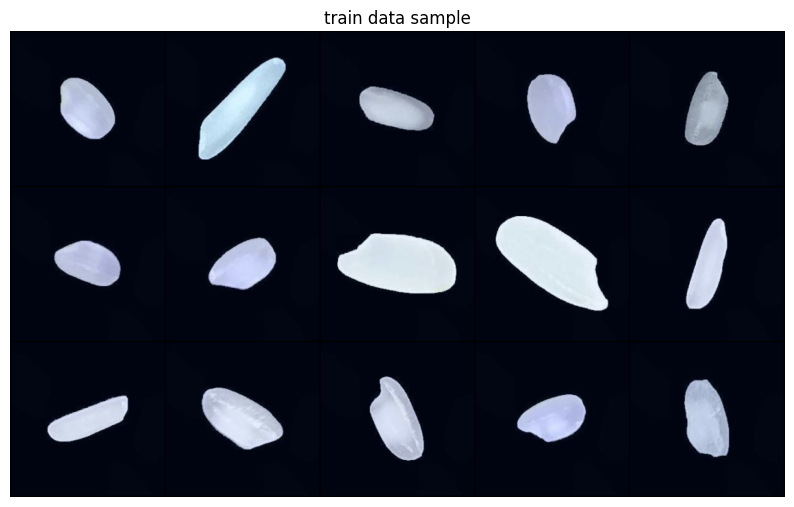

표시된 이미지의 클래스:
1: Karacadag
2: Jasmine
3: Arborio
4: Karacadag
5: Arborio
6: Karacadag
7: Karacadag
8: Ipsala
9: Ipsala
10: Jasmine
11: Jasmine
12: Arborio
13: Arborio
14: Karacadag
15: Arborio
EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
      

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Train Loss: 0.5236 Acc: 0.8985
Val Loss: 0.0724 Acc: 0.9885
최고 정확도 모델 저장: Acc=0.9885, Loss=0.0724

Epoch 2/50
----------
Train Loss: 0.0859 Acc: 0.9806
Val Loss: 0.0321 Acc: 0.9916
최고 정확도 모델 저장: Acc=0.9916, Loss=0.0321

Epoch 3/50
----------
Train Loss: 0.0486 Acc: 0.9869
Val Loss: 0.0232 Acc: 0.9935
최고 정확도 모델 저장: Acc=0.9935, Loss=0.0232

Epoch 4/50
----------
Train Loss: 0.0344 Acc: 0.9905
Val Loss: 0.0193 Acc: 0.9942
최고 정확도 모델 저장: Acc=0.9942, Loss=0.0193

Epoch 5/50
----------
Train Loss: 0.0294 Acc: 0.9910
Val Loss: 0.0163 Acc: 0.9952
최고 정확도 모델 저장: Acc=0.9952, Loss=0.0163

Epoch 6/50
----------
Train Loss: 0.0236 Acc: 0.9931
Val Loss: 0.0147 Acc: 0.9957
최고 정확도 모델 저장: Acc=0.9957, Loss=0.0147

Epoch 7/50
----------
Train Loss: 0.0215 Acc: 0.9930
Val Loss: 0.0137 Acc: 0.9960
최고 정확도 모델 저장: Acc=0.9960, Loss=0.0137

Epoch 8/50
----------
Train Loss: 0.0199 Acc: 0.9938
Val Loss: 0.0130 Acc: 0.9965
최고 정확도 모델 저장: Acc=0.9965, Loss=0.0130

Epoch 9/50
----------
Train Loss: 0.0169 Acc: 0.9948
V

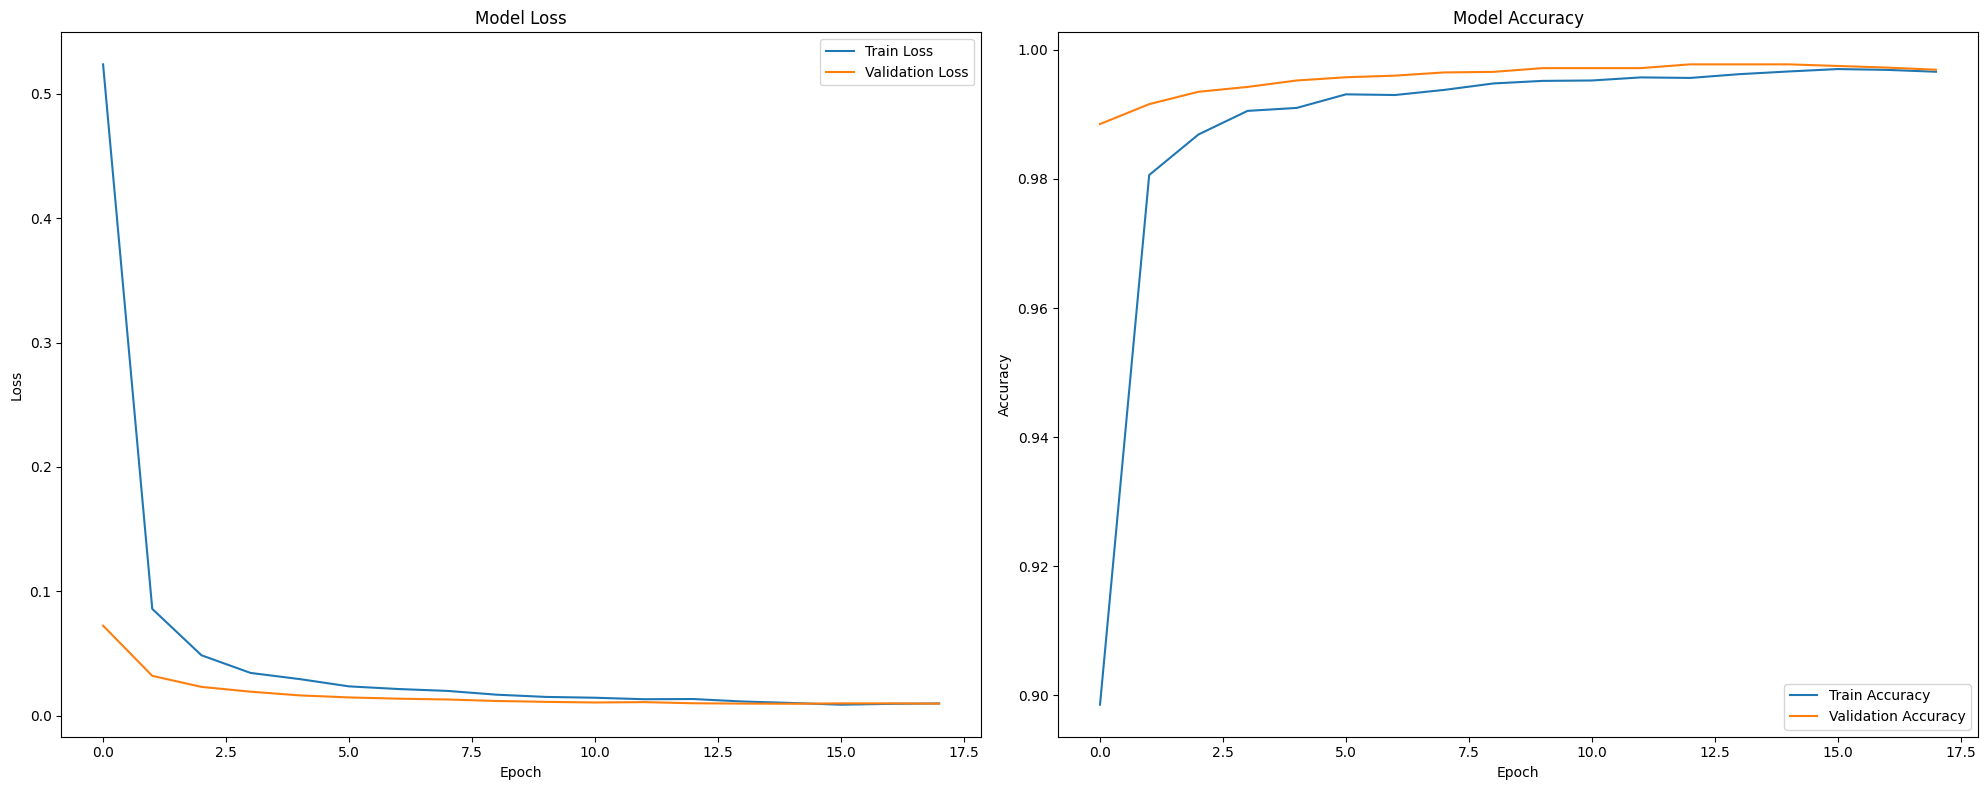

최적 모델 로드 (에폭: 13, 검증 손실: 0.0100)
최종 테스트 손실: 0.0101, 최종 테스트 정확도: 0.9971
실험 결과가 데이터베이스에 저장되었습니다. (ID: 5)

===== 테스트 결과 =====
테스트 손실: 0.0101
테스트 정확도: 0.9971

클래스별 정확도:
  Karacadag: 0.9977
  Basmati: 0.9947
  Jasmine: 0.9973
  Ipsala: 1.0000
  Arborio: 0.9957


In [7]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
# VGG16을 EfficientNet으로 변경
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights
import torchvision.utils as vutils

# GPU 사용 가능 여부 확인
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"사용 중인 디바이스: {device}")

# 랜덤 시드 설정
random_seed = 69
random.seed(random_seed)
torch.manual_seed(random_seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(random_seed)
    torch.cuda.manual_seed_all(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

# **2. 데이터셋 탐색**
# 데이터셋 경로 지정
dataset_path = "/content/rice-image/Rice_Image_Dataset"

# 클래스 폴더 목록 가져오기
class_folders = [f.name for f in os.scandir(dataset_path) if f.is_dir()]

# 클래스 수 출력
num_classes = len(class_folders)
print("클래스 수:", num_classes)
print("클래스 목록:", class_folders)

# **3. 커스텀 데이터셋 클래스 생성**
class RiceDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = [d.name for d in os.scandir(root_dir) if d.is_dir()]
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(self.classes)}

        self.image_paths = []
        self.labels = []

        # 이미지 파일과 레이블 수집
        for class_name in self.classes:
            class_dir = os.path.join(self.root_dir, class_name)
            for img_name in os.listdir(class_dir):
                if img_name.endswith('.jpg') or img_name.endswith('.png'):
                    self.image_paths.append(os.path.join(class_dir, img_name))
                    self.labels.append(self.class_to_idx[class_name])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# **4. 데이터 변환**
# 학습 데이터 변환
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 검증 데이터 변환
val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# **5. 데이터 분할 및 로드**
# 전체 데이터셋 생성
full_dataset = RiceDataset(root_dir=dataset_path, transform=None)
print(f"총 이미지 수: {len(full_dataset)}")

# 클래스별 인덱스 수집
class_indices = [[] for _ in range(num_classes)]
for idx in range(len(full_dataset)):
    _, class_idx = full_dataset[idx]
    class_indices[class_idx].append(idx)

# 클래스별 이미지 수 확인
for i, indices in enumerate(class_indices):
    print(f"클래스 {full_dataset.classes[i]}: {len(indices)}개 이미지")

# 테스트 세트 분리 (20% - 각 클래스당 3,000장)
test_indices = []
remaining_indices = []

for i, indices in enumerate(class_indices):
    # 각 클래스에서 테스트용 20% 추출
    np.random.shuffle(indices)
    test_size = int(len(indices) * 0.2)

    test_indices.extend(indices[:test_size])
    remaining_indices.extend(indices[test_size:])

# 데이터셋 크기 설정 (1.0, 0.5, 0.1, 0.01 중 선택)
size_percentage = 1.0  # 여기를 변경하여 데이터셋 크기 조절

# 선택한 비율의 데이터만 사용
available_indices = []
if size_percentage < 1.0:
    # 클래스별로 선택
    class_remaining = [[] for _ in range(num_classes)]
    for idx in remaining_indices:
        _, class_idx = full_dataset[idx]
        class_remaining[class_idx].append(idx)

    for class_idx, indices in enumerate(class_remaining):
        # 클래스별로 지정된 비율만큼 선택
        selected_size = int(len(indices) * size_percentage)
        available_indices.extend(indices[:selected_size])
else:
    # 100%인 경우 모든 남은 인덱스 사용
    available_indices = remaining_indices

# 훈련/검증 데이터 분할 (80:20)
np.random.shuffle(available_indices)
train_size = int(0.8 * len(available_indices))
train_indices = available_indices[:train_size]
val_indices = available_indices[train_size:]

# Subset으로 데이터셋 생성
train_dataset = torch.utils.data.Subset(full_dataset, train_indices)
val_dataset = torch.utils.data.Subset(full_dataset, val_indices)
test_dataset = torch.utils.data.Subset(full_dataset, test_indices)

# 데이터셋에 transform 적용
# 참고: Subset에는 transform을 직접 설정할 수 없으므로 wrapper 클래스 사용
class TransformSubset(Dataset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform

    def __len__(self):
        return len(self.subset)

    def __getitem__(self, idx):
        image, label = self.subset[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# 변환이 적용된 데이터셋 생성
train_dataset_transformed = TransformSubset(train_dataset, train_transform)
val_dataset_transformed = TransformSubset(val_dataset, val_transform)
test_dataset_transformed = TransformSubset(test_dataset, val_transform)

# 데이터 로더 생성
batch_size = 256
train_loader = DataLoader(train_dataset_transformed, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset_transformed, batch_size=batch_size, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset_transformed, batch_size=batch_size, shuffle=False, num_workers=4)

# 데이터셋 크기 출력
print(f"\n선택한 데이터셋 크기: {size_percentage * 100}%")
print(f"훈련 데이터셋 크기: {len(train_dataset)}개")
print(f"검증 데이터셋 크기: {len(val_dataset)}개")
print(f"테스트 데이터셋 크기: {len(test_dataset)}개")

# 각 데이터셋의 클래스 분포 확인
def check_class_distribution(subset):
    class_count = [0] * num_classes
    for idx in range(len(subset)):
        _, label = subset[idx]
        class_count[label] += 1
    return class_count

train_dist = check_class_distribution(train_dataset)
val_dist = check_class_distribution(val_dataset)
test_dist = check_class_distribution(test_dataset)

print("\n클래스별 분포:")
for i in range(num_classes):
    print(f"클래스 {full_dataset.classes[i]}: 훈련 {train_dist[i]}개, 검증 {val_dist[i]}개, 테스트 {test_dist[i]}개")


# **6. 이미지 샘플 시각화**
def show_batch(dataloader):
    # 배치 하나 가져오기
    images, labels = next(iter(dataloader))
    images = images.cpu()  # GPU를 사용하는 경우 CPU로 이동

    # 정규화된 이미지를 시각화를 위해 조정
    grid = vutils.make_grid(images[:15], nrow=5, normalize=True)
    grid = grid.permute(1, 2, 0).numpy()

    plt.figure(figsize=(10, 10))
    plt.imshow(grid)

    # 레이블 가져오기
    class_names = list(full_dataset.class_to_idx.keys())
    label_names = [class_names[labels[i].item()] for i in range(15)]

    plt.title('train data sample')
    plt.axis('off')
    plt.show()

    print("표시된 이미지의 클래스:")
    for i, label in enumerate(label_names):
        print(f"{i+1}: {label}")

# 학습 데이터 샘플 시각화
show_batch(train_loader)

# **7. EfficientNet 모델 로드 및 수정**
# 사전 훈련된 EfficientNet-B0 모델 로드
model = efficientnet_b0(weights=EfficientNet_B0_Weights.IMAGENET1K_V1)

# 모든 매개변수를 고정 (학습 불가능하게 설정)
for param in model.parameters():
    param.requires_grad = False

# 마지막 몇 개의 레이어만 학습 가능하게 설정
# EfficientNet의 특성 추출기 부분 마지막 2개 블록만 학습 가능하게 설정
for i, layer in enumerate(model.features):
    if i >= len(model.features) - 2:  # 마지막 2개 블록만 학습 가능하게
        for param in layer.parameters():
            param.requires_grad = True

# 분류기(classifier) 부분 수정
# EfficientNet_B0의 출력 특성 수는 1280
in_features = model.classifier[1].in_features
model.classifier = nn.Sequential(
    nn.Dropout(0.2),
    nn.Linear(in_features, num_classes)
)

# 모델을 GPU로 이동
model = model.to(device)

# 모델 구조 출력
print(model)

# **8. 손실 함수 및 옵티마이저 설정**
criterion = nn.CrossEntropyLoss()
# EfficientNet에는 더 낮은 학습률 사용
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.00005)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.2, patience=3, min_lr=1e-8, verbose=True)

# **9. 모델 체크포인트 함수**
def save_checkpoint(model, epoch, optimizer, val_loss, val_acc, filename):
    """
    모델 체크포인트를 저장하는 함수
    """
    state = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'val_loss': val_loss,
        'val_acc': val_acc
    }
    torch.save(state, filename)

# **10. 학습 및 검증 함수**
def train_one_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    running_corrects = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # 그라디언트 초기화
        optimizer.zero_grad()

        # 순전파
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # 역전파 및 최적화
        loss.backward()
        optimizer.step()

        # 통계
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc = running_corrects.double() / total

    return epoch_loss, epoch_acc.item()

def validate(model, val_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # 순전파
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            # 통계
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
            total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc = running_corrects.double() / total

    return epoch_loss, epoch_acc.item()

import sqlite3
import time
import json
import torch
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# 테스트 함수 정의
def test_model(model, test_loader, criterion, device):
    model.eval()  # 평가 모드로 설정
    test_loss = 0.0
    correct = 0
    total = 0

    # 예측값과 실제값 저장용
    all_preds = []
    all_labels = []

    with torch.no_grad():  # 그래디언트 계산 비활성화
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # 순전파
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # 통계 업데이트
            test_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (preds == labels).sum().item()

            # 나중에 분석을 위해 예측값과 실제값 저장
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # 결과 계산
    test_loss = test_loss / total
    test_acc = correct / total

    # 분류 보고서 생성
    class_names = test_loader.dataset.subset.dataset.classes
    report = classification_report(all_labels, all_preds,
                                 target_names=class_names,
                                 output_dict=True)

    # 혼동 행렬 계산
    conf_matrix = confusion_matrix(all_labels, all_preds)

    # 클래스별 정확도 계산
    class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

    return {
        'test_loss': test_loss,
        'test_acc': test_acc,
        'classification_report': report,
        'confusion_matrix': conf_matrix.tolist(),
        'class_accuracy': class_accuracy.tolist()
    }

# 데이터베이스 초기화 함수
def init_database():
    conn = sqlite3.connect('model_performance.db')
    c = conn.cursor()

    # 실험 결과 테이블 생성
    c.execute('''
    CREATE TABLE IF NOT EXISTS experiments (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        timestamp TEXT,
        model_name TEXT,
        dataset_size_percentage REAL,
        train_size INTEGER,
        val_size INTEGER,
        test_size INTEGER,
        num_classes INTEGER,
        batch_size INTEGER,
        learning_rate REAL,
        epochs INTEGER,
        best_epoch INTEGER,
        train_loss REAL,
        train_acc REAL,
        val_loss REAL,
        val_acc REAL,
        test_loss REAL,
        test_acc REAL,
        class_metrics TEXT,  -- JSON 형식으로 저장
        notes TEXT
    )
    ''')

    conn.commit()
    return conn

# 결과 저장 함수
def save_results_to_db(conn, model_name, size_percentage, train_size, val_size, test_size,
                      num_classes, batch_size, learning_rate, epochs, best_epoch,
                      train_loss, train_acc, val_loss, val_acc, test_results, notes=""):

    # 클래스별 지표를 JSON으로 변환
    class_metrics = {
        'classification_report': test_results['classification_report'],
        'confusion_matrix': test_results['confusion_matrix'],
        'class_accuracy': test_results['class_accuracy']
    }
    class_metrics_json = json.dumps(class_metrics)

    # 현재 시간 기록
    timestamp = time.strftime('%Y-%m-%d %H:%M:%S')

    # DB에 삽입
    c = conn.cursor()
    c.execute('''
    INSERT INTO experiments (
        timestamp, model_name, dataset_size_percentage, train_size, val_size, test_size,
        num_classes, batch_size, learning_rate, epochs, best_epoch,
        train_loss, train_acc, val_loss, val_acc, test_loss, test_acc,
        class_metrics, notes
    ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', (
        timestamp, model_name, size_percentage, train_size, val_size, test_size,
        num_classes, batch_size, learning_rate, epochs, best_epoch,
        train_loss, train_acc, val_loss, val_acc,
        test_results['test_loss'], test_results['test_acc'],
        class_metrics_json, notes
    ))

    conn.commit()
    print(f"실험 결과가 데이터베이스에 저장되었습니다. (ID: {c.lastrowid})")
    return c.lastrowid

# 메인 코드에서 필요한 곳에 추가
def evaluate_and_save_results(model, train_loader, val_loader, test_loader, train_dataset,
                             val_dataset, test_dataset, criterion, optimizer, device,
                             history, best_epoch, model_name="EfficientNet_B0", size_percentage=1.0,
                             learning_rate=0.001, notes=""):

    # 모델을 테스트셋으로 평가
    test_results = test_model(model, test_loader, criterion, device)

    # 데이터베이스 연결
    conn = init_database()

    # 결과 저장
    save_results_to_db(
        conn=conn,
        model_name=model_name,
        size_percentage=size_percentage,
        train_size=len(train_dataset),
        val_size=len(val_dataset),
        test_size=len(test_dataset),
        num_classes=len(test_loader.dataset.subset.dataset.classes),
        batch_size=train_loader.batch_size,
        learning_rate=optimizer.param_groups[0]['lr'],
        epochs=len(history['train_loss']) if history else 0,
        best_epoch=best_epoch,
        train_loss=history['train_loss'][-1] if history and history['train_loss'] else None,
        train_acc=history['train_acc'][-1] if history and history['train_acc'] else None,
        val_loss=history['val_loss'][-1] if history and history['val_loss'] else None,
        val_acc=history['val_acc'][-1] if history and history['val_acc'] else None,
        test_results=test_results,
        notes=notes
    )

    # DB 연결 종료
    conn.close()

    # 결과 출력
    print("\n===== 테스트 결과 =====")
    print(f"테스트 손실: {test_results['test_loss']:.4f}")
    print(f"테스트 정확도: {test_results['test_acc']:.4f}")
    print("\n클래스별 정확도:")
    for i, acc in enumerate(test_results['class_accuracy']):
        class_name = test_loader.dataset.subset.dataset.classes[i]
        print(f"  {class_name}: {acc:.4f}")

    return test_results


# **11. 학습 실행 함수**
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, device, num_epochs=50, patience=5):
    best_val_acc = 0.0  # 최고 검증 정확도 저장 변수
    no_improve_epochs = 0
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # 학습
        train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer, device)
        print(f'Train Loss: {train_loss:.4f} Acc: {train_acc:.4f}')

        # 검증
        val_loss, val_acc = validate(model, val_loader, criterion, device)
        print(f'Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}')

        # 학습률 조정
        scheduler.step(val_loss)

        # 기록
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

        # 모델 저장 (검증 정확도가 개선된 경우)
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            save_checkpoint(model, epoch, optimizer, val_loss, val_acc, "best_efficientnet_model.pth")
            print(f"최고 정확도 모델 저장: Acc={val_acc:.4f}, Loss={val_loss:.4f}")
            no_improve_epochs = 0
        else:
            no_improve_epochs += 1
            print(f"개선 없음: {no_improve_epochs}/{patience}")

        # Early stopping
        if no_improve_epochs >= patience:
            print(f'Early stopping 실행! {patience}번의 에폭 동안 검증 정확도가 개선되지 않았습니다.')
            break

        print()

    # 마지막 모델 상태 저장
    save_checkpoint(model, epoch, optimizer, val_loss, val_acc, "final_efficientnet_model.pth")

    print(f"\n학습 완료. 최고 검증 정확도: {best_val_acc:.4f}")

    return train_losses, val_losses, train_accs, val_accs

# **12. 학습 실행**
try:
    print("모델 학습 시작...")
    train_losses, val_losses, train_accs, val_accs = train_model(
        model, train_loader, val_loader, criterion, optimizer, scheduler, device, num_epochs=50, patience=5
    )
    print("학습 완료!")
except KeyboardInterrupt:
    print("\n학습이 중단되었습니다.")

# **13. 학습 결과 시각화**
def plot_results(train_losses, val_losses, train_accs, val_accs):
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')

    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Train Accuracy')
    plt.plot(val_accs, label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

# 결과 시각화
try:
    plot_results(train_losses, val_losses, train_accs, val_accs)
except NameError:
    print("학습이 아직 실행되지 않았거나 중단되었습니다.")

# **14. 최적 모델 로드 및 평가**
def load_model(model, path):
    checkpoint = torch.load(path)
    model.load_state_dict(checkpoint['model_state_dict'])
    return model, checkpoint['epoch'], checkpoint['val_loss'], checkpoint.get('val_acc', 0.0)

try:
    # 최적 모델 로드
    model, best_epoch, best_val_loss, best_val_acc = load_model(model, "best_efficientnet_model.pth")
    print(f"최적 모델 로드 (에폭: {best_epoch+1}, 검증 손실: {best_val_loss:.4f})")

    # 테스트 데이터로 최종 평가
    test_loss, test_acc = validate(model, test_loader, criterion, device)
    print(f"최종 테스트 손실: {test_loss:.4f}, 최종 테스트 정확도: {test_acc:.4f}")

    # 학습 히스토리 (없는 경우 빈 딕셔너리 생성)
    history = {
        'train_loss': train_losses if 'train_losses' in locals() else [],
        'val_loss': val_losses if 'val_losses' in locals() else [],
        'train_acc': train_accs if 'train_accs' in locals() else [],
        'val_acc': val_accs if 'val_accs' in locals() else []
    }

    # 결과를 DB에 저장
    evaluate_and_save_results(
        model=model,
        train_loader=train_loader,
        val_loader=val_loader,
        test_loader=test_loader,
        train_dataset=train_dataset,
        val_dataset=val_dataset,
        test_dataset=test_dataset,
        criterion=criterion,
        optimizer=optimizer,
        device=device,
        history=history,
        best_epoch=best_epoch,
        model_name="EfficientNet_B0",  # 모델 이름 변경
        size_percentage=size_percentage,
        learning_rate=optimizer.param_groups[0]['lr'],
        notes=f"데이터셋 크기: {size_percentage * 100}%, EfficientNet-B0 사용"
    )

except FileNotFoundError:
    print("저장된 모델 파일을 찾을 수 없습니다. 학습을 먼저 실행해주세요.")